In [1]:
# Imports at the top of the Notebook for ease of use
import numpy as np
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
sess = tf.InteractiveSession()

# Multilayer perceptron

In this notebook, we'll train a simple neural network to recognize hand-written digits.

__1. The dataset__

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The MNIST dataset contains 70,000 samples, consisting of a 28x28 greyscale image, and a label. The images have been flattened to a feature vector with 784 dimensions. The labels are one-hot encoded in a 10-dimensional vector.

In [4]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

(55000, 784)
(55000, 10)


We can reshape a training image for display purposes.

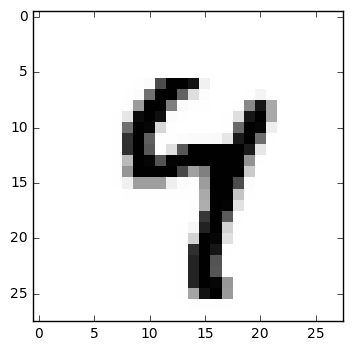

In [5]:
plt.imshow(mnist.train.images[2].reshape([28, 28]), cmap='Greys', interpolation='none')

__2. The model__

In [6]:
W_1 = tf.Variable(tf.truncated_normal(shape=[784, 64], stddev=0.1))
b_1 = tf.Variable(tf.constant(0.0, shape=[64]))

W_2 = tf.Variable(tf.truncated_normal(shape=[64, 10], stddev=0.1))
b_2 = tf.Variable(tf.constant(0.0, shape=[10]))

In [7]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

h_1 = tf.nn.relu(tf.matmul(x, W_1) + b_1)
y = tf.matmul(h_1, W_2) + b_2

In [8]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [9]:
sess.run(tf.global_variables_initializer())

In [10]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.0726


The untrained model achieves an accuracy a little over 10%, which is slightly better than randomly assigning a label to each training image.

__3. Defining the loss and picking an optimizer__

In [11]:
loss = tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y)

optimizer = tf.train.GradientDescentOptimizer(0.01)
train_step = optimizer.minimize(loss)

__4. Performing gradient descent__

In [12]:
for _ in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.968
